In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train = pd.read_csv('data.csv', index_col=0)
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
train = train.drop(["Unnamed: 32"], axis=1)
train.shape

(569, 31)

In [5]:
# remove the 'Unnamed: 32' column
df = df.drop('Unnamed: 32', axis=1)

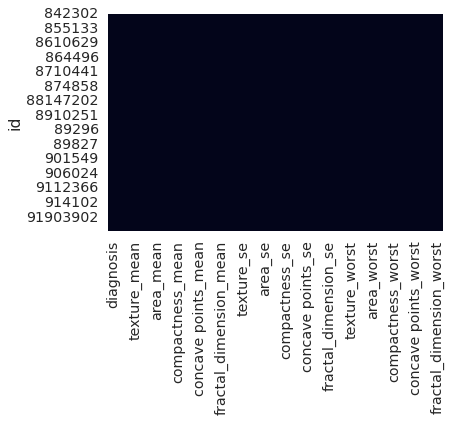

In [14]:
# Heatmap to mark all the missing values in white colour.
sns.heatmap(train.isnull(), cbar=False)

In [15]:
train["diagnosis"].replace({"M":2, "B":1}, inplace=True)
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,2,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
train_corr = train.corr()

[Text(0.5, 0, 'diagnosis'),
 Text(1.5, 0, 'radius_mean'),
 Text(2.5, 0, 'texture_mean'),
 Text(3.5, 0, 'perimeter_mean'),
 Text(4.5, 0, 'area_mean'),
 Text(5.5, 0, 'smoothness_mean'),
 Text(6.5, 0, 'compactness_mean'),
 Text(7.5, 0, 'concavity_mean'),
 Text(8.5, 0, 'concave points_mean'),
 Text(9.5, 0, 'symmetry_mean'),
 Text(10.5, 0, 'fractal_dimension_mean'),
 Text(11.5, 0, 'radius_se'),
 Text(12.5, 0, 'texture_se'),
 Text(13.5, 0, 'perimeter_se'),
 Text(14.5, 0, 'area_se'),
 Text(15.5, 0, 'smoothness_se'),
 Text(16.5, 0, 'compactness_se'),
 Text(17.5, 0, 'concavity_se'),
 Text(18.5, 0, 'concave points_se'),
 Text(19.5, 0, 'symmetry_se'),
 Text(20.5, 0, 'fractal_dimension_se'),
 Text(21.5, 0, 'radius_worst'),
 Text(22.5, 0, 'texture_worst'),
 Text(23.5, 0, 'perimeter_worst'),
 Text(24.5, 0, 'area_worst'),
 Text(25.5, 0, 'smoothness_worst'),
 Text(26.5, 0, 'compactness_worst'),
 Text(27.5, 0, 'concavity_worst'),
 Text(28.5, 0, 'concave points_worst'),
 Text(29.5, 0, 'symmetry_worst'),

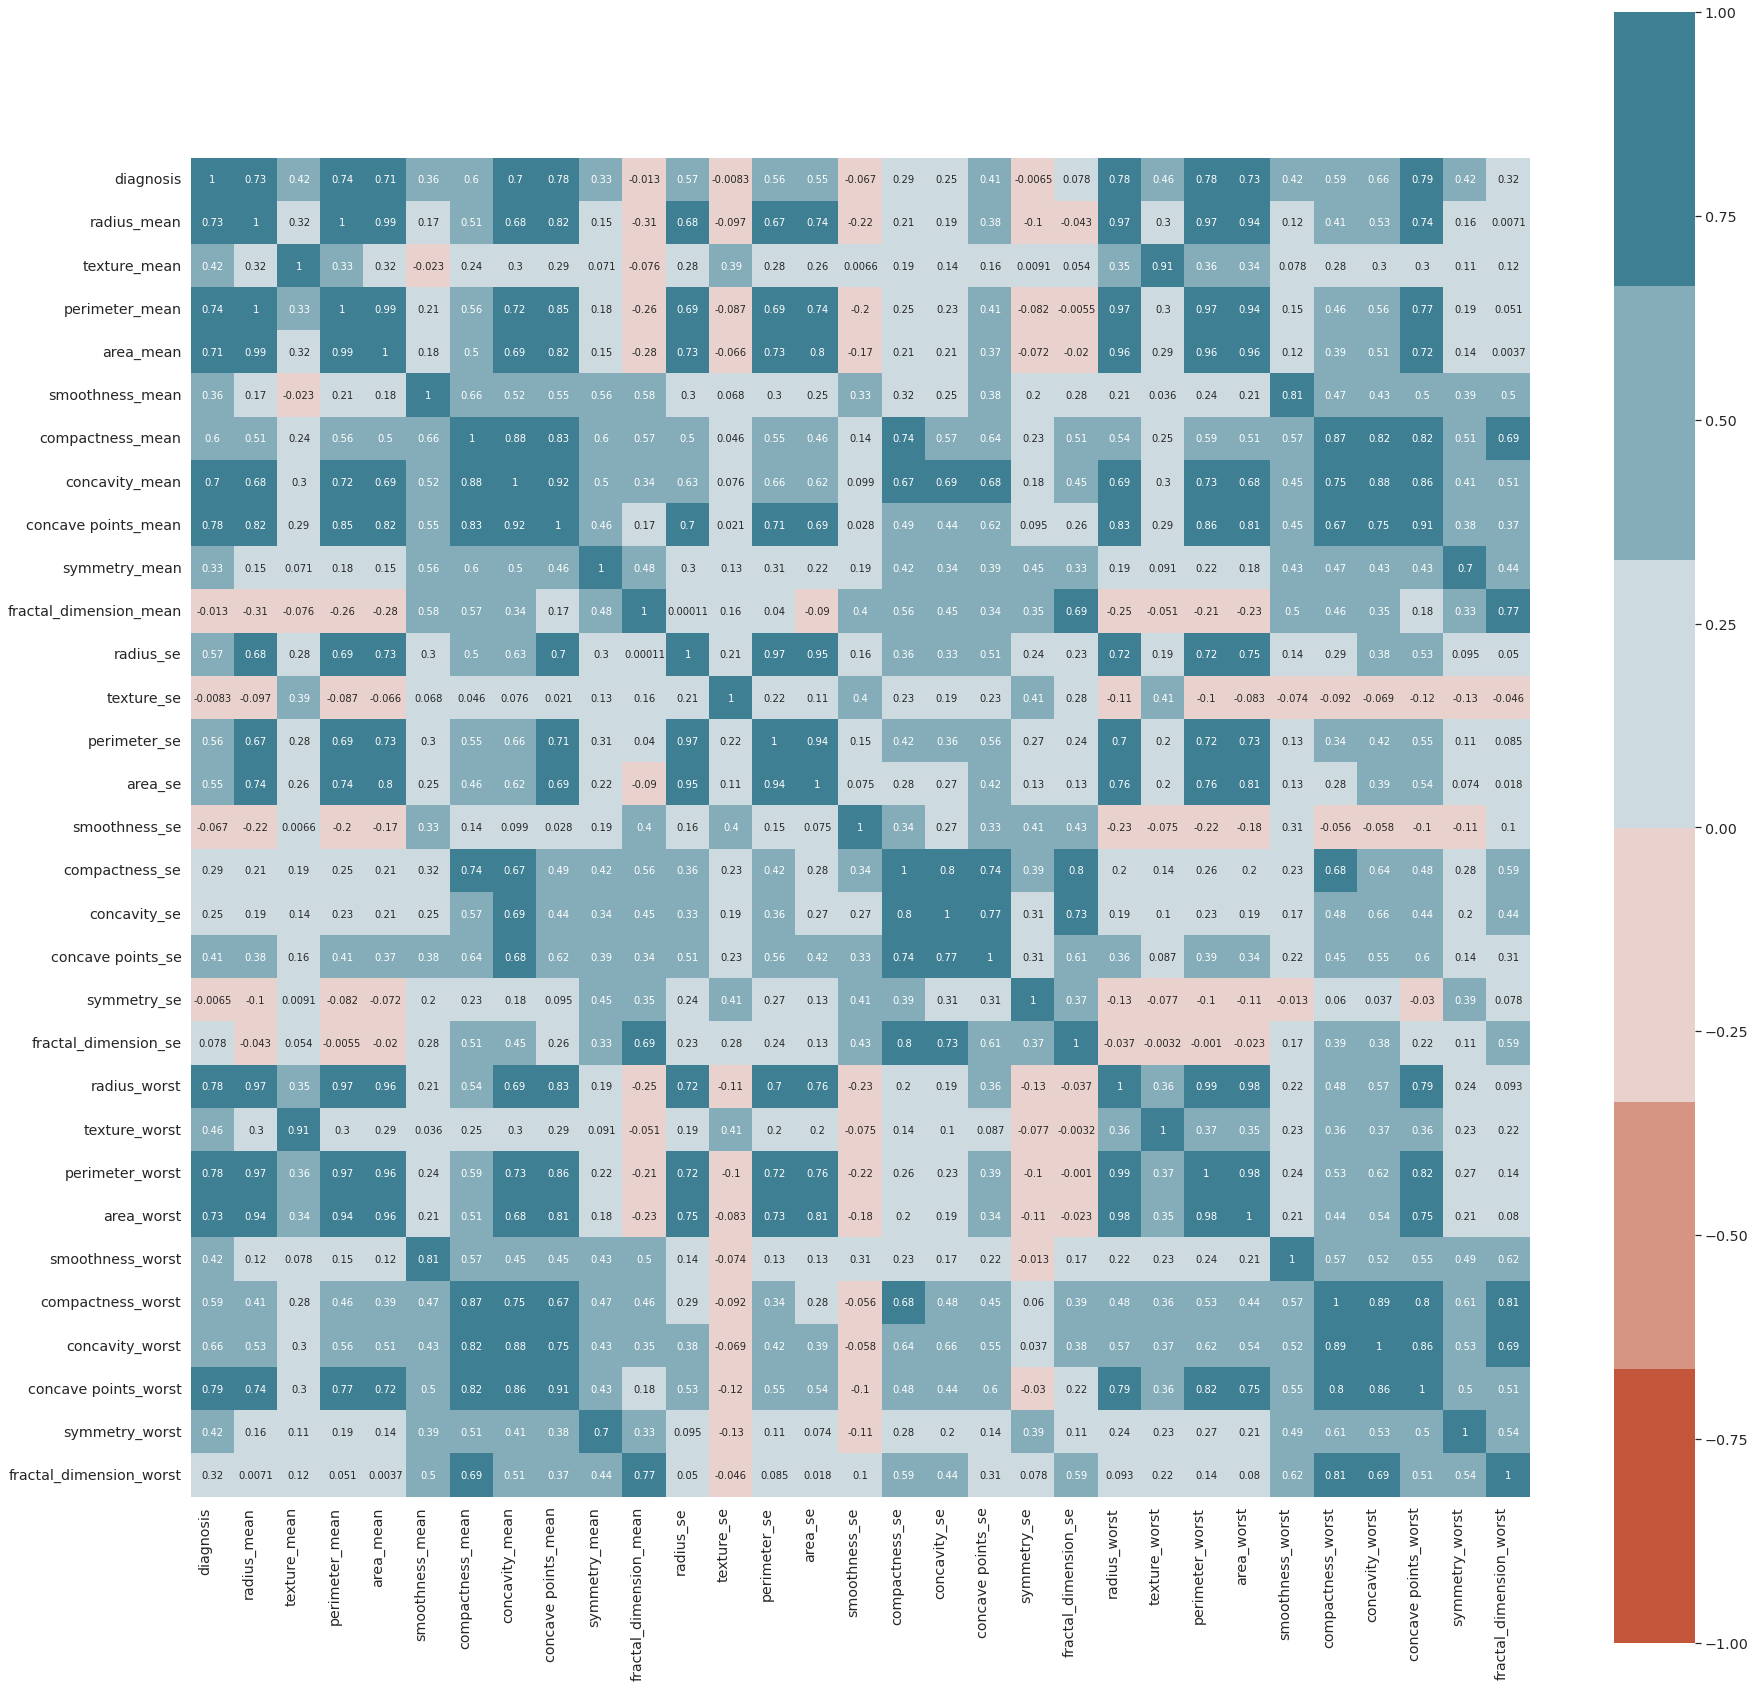

In [17]:
plt.subplots(figsize=(30, 30))
ax = sns.heatmap(
    train_corr,
    vmin = -1.0, vmax = 1.0, center=0,
    cmap = sns.diverging_palette(20, 220),
    annot = True,
    square = True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='right'
)

In [18]:
corr_target = abs(train_corr["diagnosis"])
features = corr_target[corr_target>=0.5]
features = features.keys()
features = features.delete(0)
features = features.tolist()
features

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [19]:
X = train[features]
X.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
id,,,,,,,,,,,,,,,
842302,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
842517,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
84300903,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
84348301,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
84358402,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


In [20]:
y = train["diagnosis"]
y.head()

id
842302      2
842517      2
84300903    2
84348301    2
84358402    2
Name: diagnosis, dtype: int64

In [21]:
# 80% - 20% Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=False)

# 70% - 30% Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=42)

algo = ["XGBoost Classifier", "Random Forest Classifier", "Logistic Regression", "AdaBoost Classifier", "Gradient Boosting", "Bagging Classifier", "CatBoost Classifier"]
accuracy1=[]
precision1 = []
recall1 = []
f1_score1 = []

accuracy2=[]
precision2 = []
recall2 = []
f1_score2 = []

In [23]:

# Model 1 with 80% - 20% split
xg_model1 = XGBClassifier()
xg_model1.fit(X_train1, y_train1)
y_pred_xg1 = xg_model1.predict(X_test1)

# Model 2 with 70% - 30% split
xg_model2 = XGBClassifier()
xg_model2.fit(X_train2, y_train2)
y_pred_xg2 = xg_model2.predict(X_test2)

# The statement below is meant to be used for continuous target variable not categorical
# predictions = [round(value) for value in y_pred]

# Calculating Evaluation Metrics for the Model 1
xg_accuracy1 = accuracy_score(y_test1, y_pred_xg1) * 100
xg_confusion1 = confusion_matrix(y_test1, y_pred_xg1)
xg_precision1 = xg_confusion1[0][0]/(xg_confusion1[0][0] + xg_confusion1[1][0]) * 100
xg_recall1 = xg_confusion1[0][0]/(xg_confusion1[0][0] + xg_confusion1[0][1]) * 100
xg_f1_score1 = ((2 * xg_precision1 * xg_recall1) / (xg_precision1 + xg_recall1)) / 100

# Calculating Evaluation Metrics for the Model 2
xg_accuracy2 = accuracy_score(y_test2, y_pred_xg2) * 100
xg_confusion2 = confusion_matrix(y_test2, y_pred_xg2)
xg_precision2 = xg_confusion2[0][0]/(xg_confusion2[0][0] + xg_confusion2[1][0]) * 100
xg_recall2 = xg_confusion2[0][0]/(xg_confusion2[0][0] + xg_confusion2[0][1]) * 100
xg_f1_score2 = ((2 * xg_precision2 * xg_recall2) / (xg_precision2 + xg_recall2)) / 100

# Storing all the metrics in values for Model 1 in common lists
accuracy1.append(round(xg_accuracy1, 2))
precision1.append(round(xg_precision1, 2))
recall1.append(round(xg_recall1, 2))
f1_score1.append(round(xg_f1_score1, 4))

# Storing all the metrics in values for Model 2 in common lists
accuracy2.append(round(xg_accuracy2, 2))
precision2.append(round(xg_precision2, 2))
recall2.append(round(xg_recall2, 2))
f1_score2.append(round(xg_f1_score2, 4))

In [24]:
#Random Forest 
# Model 1 with 80% - 20% split
rfc_model1 = RandomForestClassifier()
rfc_model1.fit(X_train1, y_train1)
y_pred_rf1 = rfc_model1.predict(X_test1)

# Model 2 with 70% - 30% split
rfc_model2 = RandomForestClassifier()
rfc_model2.fit(X_train2, y_train2)
y_pred_rf2 = rfc_model2.predict(X_test2)

# Calculating Evaluation Metrics for the Model 1
rf_accuracy1 = accuracy_score(y_test1, y_pred_rf1) * 100
rf_confusion1 = confusion_matrix(y_test1, y_pred_rf1)
rf_precision1 = xg_confusion1[0][0]/(rf_confusion1[0][0] + rf_confusion1[1][0]) * 100
rf_recall1 = xg_confusion1[0][0]/(rf_confusion1[0][0] + rf_confusion1[0][1]) * 100
rf_f1_score1 = ((2 * rf_precision1 * rf_recall1) / (rf_precision1 + rf_recall1)) / 100

# Calculating Evaluation Metrics for the Model 2
rf_accuracy2 = accuracy_score(y_test2, y_pred_rf2) * 100
rf_confusion2 = confusion_matrix(y_test2, y_pred_rf2)
rf_precision2 = xg_confusion2[0][0]/(rf_confusion2[0][0] + rf_confusion2[1][0]) * 100
rf_recall2 = xg_confusion2[0][0]/(rf_confusion2[0][0] + rf_confusion2[0][1]) * 100
rf_f1_score2 = ((2 * rf_precision2 * rf_recall2) / (rf_precision2 + rf_recall2)) / 100

# Storing all the metrics in values for Model 1 in common lists
accuracy1.append(round(rf_accuracy1, 2))
precision1.append(round(rf_precision1, 2))
recall1.append(round(rf_recall1, 2))
f1_score1.append(round(rf_f1_score1, 4))

# Storing all the metrics in values for Model 2 in common lists
accuracy2.append(round(rf_accuracy2, 2))
precision2.append(round(rf_precision2, 2))
recall2.append(round(rf_recall2, 2))
f1_score2.append(round(rf_f1_score2, 4))

In [25]:
# Evaluation Metrics for the Model 1
print("Results for the 80 - 20 split")
print("Accuracy:", xg_accuracy1)
print("Precision:", xg_precision1)
print("Recall:", xg_recall1)
print("F1 Score:", xg_f1_score1)

print("----------------------------------")
print("----------------------------------")

# Evaluation Metrics for the Model 2
print("Results for the 70 - 30 split")
print("Accuracy:", xg_accuracy2)
print("Precision:", xg_precision2)
print("Recall:", xg_recall2)
print("F1 Score:", xg_f1_score2)

Results for the 80 - 20 split
Accuracy: 97.36842105263158
Precision: 98.85057471264368
Recall: 97.72727272727273
F1 Score: 0.9828571428571428
----------------------------------
----------------------------------
Results for the 70 - 30 split
Accuracy: 95.32163742690058
Precision: 96.29629629629629
Recall: 96.29629629629629
F1 Score: 0.9629629629629629
